# Wrangle and Analyze Project

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import time

# GATHER

In [2]:
#Read given CSV file "WeRateDogs Twitter archive" 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### Column Description:

**tweet_id**: the unique identifier for each tweet

**in_reply_to_status_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

**in_reply_to_user_id**: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

**timestamp**: time when Tweet was created

**source**: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

**text**: actual UTF-8 text of the status update

**retweeted_status_id**: if Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

**retweeted_status_user_id**: if Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

**retweeted_status_timestamp**: time of retweet

**expanded_urls**: tweet URL

**rating_numerator**: numerator of the rating of a dog. Note: ratings almost always greater than 10

**rating_denominator**: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

**name**: name of the dog

**doggo**: one of the 4 dog "types"

**floofer**: one of the 4 dog "types"

**pupper**: one of the 4 dog "types"

**puppo**: one of the 4 dog "types"

In [4]:
#Get image prediction file from Udacity Website
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [5]:
image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Column Description:

**tweet_id**: the unique identifier for each tweet

**jpg_url**: dog's image URL

**img_num**: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

**p1**: algorithm's #1 prediction for the image in the tweet

**p1_conf**: how confident the algorithm is in its #1 prediction

**p1_dog**: whether or not the #1 prediction is a breed of dog

**p2**: algorithm's #2 prediction for the image in the tweet

**p2_conf**: how confident the algorithm is in its #2 prediction

**p2_dog**: whether or not the #2 prediction is a breed of dog

**p3**: algorithm's #3 prediction for the image in the tweet

**p3_conf**: how confident the algorithm is in its #3 prediction

**p3_dog**: whether or not the #3 prediction is a breed of dog

In [6]:
# Declare Twitter API keys and access tokens
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [7]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [8]:
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [9]:
# Use Twitter API to collect status data on tweets present in twitter1 dataframe
start = time.time() # start timer

tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)
        
end = time.time() # end timer
print(end - start)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
845459076796616705
842892208864923648
837012587749474308
827228250799742977
812747805718642688
802247111496568832
775096608509886464
770743923962707968
Rate limit reached. Sleeping for: 619
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 557
2543.4357464313507


In [10]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [11]:
# Load the Twitter API data
status_df = pd.read_json('tweet_json.txt')
status_df['tweet_id'] = tweet_id_success
status_df = status_df[['tweet_id', 'favorite_count', 'retweet_count']]

In [12]:
status_df.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37805,8244
1,892177421306343426,32485,6091


#### Column Description

**tweet_id**: the unique identifier for each tweet

**favorite_count**: indicates approximately how many times this Tweet has been liked by Twitter users

**retweet_count**: number of times this Tweet has been retweeted

*Sources*:
* https://stackabuse.com/reading-and-writing-json-to-a-file-in-python 
* https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python?answertab=oldest#tab-top 
* https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id 
* https://tweepy.readthedocs.io/en/v3.5.0/
* https://tweepy.readthedocs.io/en/v3.2.0/api.html#API.get_status
* https://wiki.python.org/moin/HandlingExceptions

# ASSESS

### Data Quality Issues
**twitter_archive**

* Some column names are not very specific to what they stand for
* tweet_id is an integer
* timestamp and retweeted_status_timestamp are type 'object'
* source is with a and \a tags surrounding the text
* contains retweets and therefore duplicates (the ones left will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns and can therefore be dropped)
* text column contains untruncated text instead of displayable text
* the way the rating is displayed in general in not standardized and therfore difficult to analyze
* dog names starting with lowercase characters (e.g. a, an, actually, by)

**image_prediction**
* Some column names are not very specific to what they stand for

**status_df**
* Some column names are not very specific to what they stand for
* tweet_id is an integer

### Tidiness Issues
**twitter_archive**

* Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls
* Last 4 columns should be merged (doggo, floofer, pupper, puppo) and column should be called "stage"

**image_prediction**

* Could be merged with twitter_archive as data is talking about the same tweets, though there are different numbers of rows: tweet_id(s) of twitter_archive table are missing in image_predictions table

**status_df**

* Should be merged with twitter_archive as data is talking about the same tweets, though there are different numbers of rows: tweet_id(s) of twitter_archive table are missing in status_df table


In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None
810,771380798096281600,NaN,NaN,2016-09-01 16:14:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fizz. She thinks love is a social constru...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,None,None,None,None
644,793180763617361921,NaN,NaN,2016-10-31 20:00:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Newt. He's a strawberry. 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793180763...,11,10,Newt,None,None,None,None


In [18]:
twitter_archive['text'].value_counts()

RT @frasercampbell_: oh my... what's that... beautiful scarf around your neck... 14/10 a h*ckin good dog in a h*ckin good game @GoodDogsGam…                             1
This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k                             1
@Marc_IRL pixelated af 12/10                                                                                                                                             1
HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOOD DOGGI ALL THE TIME MISTAKES HAPPEN 13/10\nhttps://t.co/G2ms0A5jWM                                                        1
Say hello to Petrick. He's an Altostratus Floofer. Just had a run in with a trash bag. Groovy checkered floor. 11/10 https://t.co/rwW7z1JAOF                             1
Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both 12/10 https://t.co/4UwCTW3lXG                         

In [19]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
twitter_archive['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
Toby          7
an            7
Buddy         7
Bailey        7
Daisy         7
Jack          6
Oscar         6
Scout         6
Milo          6
Dave          6
Leo           6
Koda          6
Rusty         6
Jax           6
Bella         6
Stanley       6
Louis         5
           ... 
Kaia          1
Kuyu          1
Benny         1
Ole           1
Alf           1
Bertson       1
Einstein      1
Jeffri        1
Lulu          1
Skittle       1
Miguel        1
Mimosa        1
Ralphson      1
Darrel        1
Fillup        1
Koko          1
Cheesy        1
Raphael       1
Antony        1
Aja           1
Willie        1
Billy         1
Tobi          1
Eevee         1
Emmie         1
Julius        1
Finnegus      1
Iroh          1
Buddah        1
Edgar         1
Name: name, Length: 957,

In [23]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1464,778408200802557953,https://pbs.twimg.com/media/Cs12ICuWAAECNRy.jpg,3,Pembroke,0.848362,True,Cardigan,0.108124,True,beagle,0.011942,True
932,703268521220972544,https://pbs.twimg.com/media/CcKC-5LW4AAK-nb.jpg,1,wool,0.525434,False,fur_coat,0.236391,False,kuvasz,0.038243,True
179,669324657376567296,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,1,seashore,0.201659,False,Cardigan,0.131544,True,sandbar,0.101430,False


In [25]:
status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [26]:
status_df.sample(3)

,tweet_id,favorite_count,retweet_count
828,766714921925144576,2748,417
424,820446719150292993,0,2792
1538,688898160958271489,2194,838


# CLEAN

### Data Quality Issues
**twitter_archive**

* Some column names are not very specific to what they stand for-DONE
* tweet_id is an integer -DONE
* timestamp and retweeted_status_timestamp are type 'object'-DONE
* source is with a and \a tags surrounding the text - COLUMN DROPPED
* contains retweets and therefore duplicates (the ones left will have empty retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns and can therefore be dropped)-DONE
* text column contains untruncated text instead of displayable text -DONE
* the way the rating is displayed in general in not standardized and therfore difficult to analyze-DONE
* dog names starting with lowercase characters (e.g. a, an, actually, by)-DONE

**image_prediction**
* Some column names are not very specific to what they stand for -DONE

**status_df**
* Some column names are not very specific to what they stand for- DONE
* tweet_id is an integer- DONE

**-> Solutions**

* Remove retweets (Rows where 'retweeted_status_id' is a NaN will be kept (if it has a value it will be removed), then the 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.
* Change tweet_id to a string/object
* Convert 'timestamp' to a datetime object ('retweeted_status_timestamp' was deleted)
* Replace all inaccurate names with NaNs
* Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'
* Drop undesired columns and change column name

### Tidiness Issues
**twitter_archive**

* Missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls -DONE
* Last 4 columns should be merged (doggo, floofer, pupper, puppo) and column should be called "stage"-DONE

**image_prediction**

* Could be merged with twitter_archive as data is talking about the same tweets, though there are different numbers of rows: tweet_id(s) of twitter_archive table are missing in image_predictions table -DONE

**status_df**

* Should be merged with twitter_archive as data is talking about the same tweets, though there are different numbers of rows: tweet_id(s) of twitter_archive table are missing in status_df table -DONE

**-> Solutions**

* Merge all dataframes on 'tweet_id'
* One column for dog "stage"

In [27]:
# Make copies of the dataframes for cleaning

twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
status_df = status_df.copy()

### Tidiness Issue - Merge all dataframes

In [32]:
# Merge the twitter_archive, image_prediction, and status_df on 'tweet_id'

from functools import reduce

dfs = [twitter_archive_clean, image_prediction_clean, status_df]
twitter = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

In [36]:
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37805,8244
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32485,6091


In [37]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                       2066 

### Tidiness issue 2 - One column for dog "stage"

In [38]:
# Extract dog stages from 'text' column into new 'stage' column 
twitter['stage'] = twitter['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [41]:
# Check that first few instances of dog_stage are similar 
twitter[['stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [42]:
# Drop doggo, floofer, pupper, and puppo columns
twitter = twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [43]:
twitter.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,37805,8244,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,32485,6091,NaN


### Quality Issue 1 - Remove retweets

In [44]:
# Keep columns where 'retweeted_status_id' is NaN
twitter = twitter[np.isnan(twitter.retweeted_status_id)]

# Check that there are no non-null entries for 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp'

print(twitter.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
twitter = twitter.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 27 columns):
tweet_id                      1991 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1991 non-null object
source                        1991 non-null object
text                          1991 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1991 non-null object
rating_numerator              1991 non-null int64
rating_denominator            1991 non-null int64
name                          1991 non-null object
jpg_url                       1991 non-null object
img_num                       1991 non-null int64
p1                            1991 non-null object
p1_conf                       1991 non-null float64
p1_dog                        1991 non

In [45]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 24 columns):
tweet_id                 1991 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null object
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf                  1991 non-null float64
p2_dog                   1991 non-null bool
p3                       1991 non-null object
p3_conf                  19

### Quality Issue 2 - tweet_id is an integer

In [46]:
# Change 'tweet_id' to a string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

In [47]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 24 columns):
tweet_id                 1991 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null object
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf                  1991 non-null float64
p2_dog                   1991 non-null bool
p3                       1991 non-null object
p3_conf                  1

### Quality Issue 3 - 'timestamp' type

In [49]:
#Remove the time zone information from 'timestamp' column
twitter['timestamp'] = twitter['timestamp'].str.slice(start=0, stop=-6)

In [50]:
# Change the 'timestamp' column to a datetime object
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [51]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 2065
Data columns (total 24 columns):
tweet_id                 1991 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
rating_numerator         1991 non-null int64
rating_denominator       1991 non-null int64
name                     1991 non-null object
jpg_url                  1991 non-null object
img_num                  1991 non-null int64
p1                       1991 non-null object
p1_conf                  1991 non-null float64
p1_dog                   1991 non-null bool
p2                       1991 non-null object
p2_conf                  1991 non-null float64
p2_dog                   1991 non-null bool
p3                       1991 non-null object
p3_conf           

### Quality Issue 4 -Issues with 'name'

In [52]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [53]:
# Replace all names that start with a lowercase letter with a NaN
twitter['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter['name'].replace('None', 
                        np.nan,
                       inplace = True)

In [54]:
twitter['name'].value_counts()

Charlie         10
Oliver          10
Lucy            10
Cooper          10
Tucker           9
Penny            9
Sadie            8
Winston          8
Daisy            7
Toby             7
Lola             7
Jax              6
Bella            6
Koda             6
Stanley          6
Bo               6
Rusty            5
Leo              5
Dave             5
Buddy            5
Milo             5
Bailey           5
Chester          5
Louis            5
Oscar            5
Scout            5
Archie           4
Alfie            4
Bear             4
Dexter           4
                ..
Nugget           1
Keet             1
Swagger          1
Milky            1
Snickers         1
Tobi             1
Carter           1
Willie           1
Miguel           1
Arya             1
Sully            1
Brady            1
Devón            1
Ziva             1
Cleopatricia     1
Glenn            1
Remus            1
Cecil            1
Mimosa           1
Antony           1
Ralphson         1
Anakin      

### Quality Issue 5 - Unstandardized ratings

In [55]:
# Calulate the value of 'rating'
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

In [56]:
twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,bagel,0.085851,False,banana,0.07611,False,37805,8244,NaN,1.3


### Quality Issue 6 - Drop undesired columns and change column names

In [57]:
# Change some column names so they are shorter
twitter.rename(columns={'rating_numerator': 'numerator', 
                        'rating_denominator': 'denominator'}, inplace=True)

# Drop undesired columns to make dataframe easier to view
twitter.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'source',
              'img_num'], axis=1, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)

In [58]:
twitter.head(1)

,tweet_id,timestamp,text,expanded_urls,numerator,denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,37805,8244,NaN,1.3


## Analyze and Visualize

In [59]:
# Save twitter dataframe to a CSV file
twitter.to_csv('twitter_archive_master.csv')

**Number of Tweets posted by WeRateDogs over time**

In [60]:
twitter['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    296
2015-12    366
2016-01    169
2016-02    111
2016-03    120
2016-04     54
2016-05     57
2016-06     81
2016-07     87
2016-08     59
2016-09     63
2016-10     65
2016-11     53
2016-12     54
2017-01     66
2017-02     64
2017-03     48
2017-04     41
2017-05     43
2017-06     43
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

We can see that most Tweets in our dataset were posted in the end of 2015 and the beginning of 2016. 

**Ratings over time**

<function matplotlib.pyplot.show(*args, **kw)>

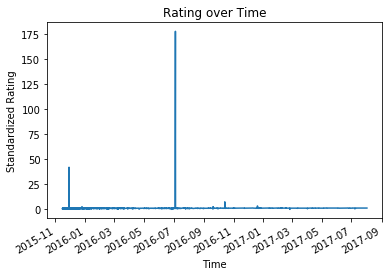

In [61]:
# Plot standardized ratings over time
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show

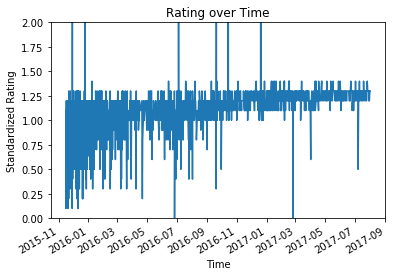

In [62]:
# Plot standardized ratings over time from 0-2, as the ones over 2 must definetly be outliers.
twitter.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 2)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

As the standardized ratings (numerator/denominator = 10) increases over time, we can observe that the popular rating over 10 was given mostly between the end of 2015 and the beginning of 2016, which is also the time when people posted the most. We can conclude that at that time there was probably a trend or hype around WeRateDogs.

**Most common dog names**

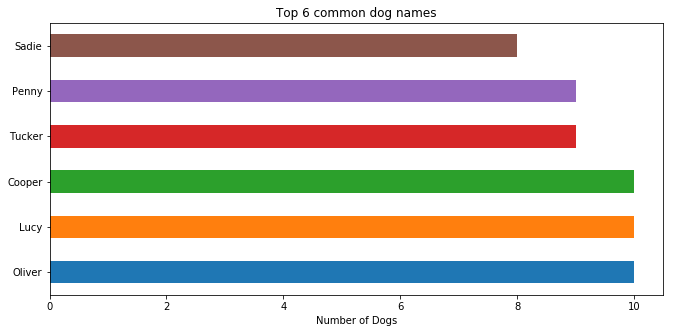

In [63]:
twitter.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

In [66]:
twitter.name.value_counts()

Charlie         10
Oliver          10
Lucy            10
Cooper          10
Tucker           9
Penny            9
Sadie            8
Winston          8
Daisy            7
Toby             7
Lola             7
Jax              6
Bella            6
Koda             6
Stanley          6
Bo               6
Rusty            5
Leo              5
Dave             5
Buddy            5
Milo             5
Bailey           5
Chester          5
Louis            5
Oscar            5
Scout            5
Archie           4
Alfie            4
Bear             4
Dexter           4
                ..
Nugget           1
Keet             1
Swagger          1
Milky            1
Snickers         1
Tobi             1
Carter           1
Willie           1
Miguel           1
Arya             1
Sully            1
Brady            1
Devón            1
Ziva             1
Cleopatricia     1
Glenn            1
Remus            1
Cecil            1
Mimosa           1
Antony           1
Ralphson         1
Anakin      

In the visualization and the calculation below we can see the most popular dog names in our dataset. The top 3 are: Charlie, Lucy and Cooper.

**Correlation between retweet and favorite count**

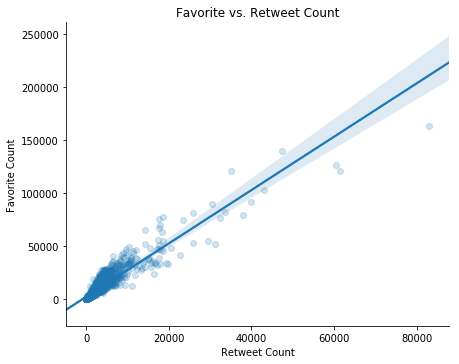

In [68]:
# Plot scatterplot of retweet vs favorite count
import seaborn as sns

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

We can see that favorite and retweet counts are highly positively correlated. For about every 4 favorites there is 1 retweet.